# Recolección de datos electorales en Ecuador año 2009

Empezamos recolectando la información de las elecciones correspondientes al año 2002 de la página oficial del [CNE](http://cne.gob.ec/es/estadisticas/bases-de-datos)

Nos dirigimos a la carpeta de elecciones generales del año 2009, y recopilamos la información necesaria. Una vez descargados los archivos y exportados en formato csv, procedemos a subirlos a nuestro notebook.

## Descargando las bibliotecas necesarias para trabajar y limpiando las tablas

In [2]:
import pandas as pd
import numpy as np
import os
import glob 
import matplotlib as mp 
import matplotlib.pyplot as plt

In [3]:
os.chdir(r"C:\Users\HP\Documents\GitHub\Proyecto_Datos_Elecciones_Ecuador_2002_2017\2009")
df_c2009=pd.read_csv('C2009.csv')
df_c2009.head()

,DIGNIDAD_CODIGO,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_EDAD_EXACTA,CANDIDATO_GRUPO_DE_EDAD,SUPLENTE_NOMBRE,SUPLENTE_SEXO,SUPLENTE_EDAD_EXACTA,SUPLENTE_GRUPOS_DE_EDAD
0,1,48,1000000000001,1,0,0,0,GUTIERREZ BORBUA LUCIO EDWIN,1,52.093151,3.0,MANTILLA HUERTA LUIS FELIPE,1,58.67123287671233,3
1,1,5,1000000000002,1,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,58.427397,3.0,AZIN ARCE ANNABELLA EMMA,2,47.90684931506849,3
2,1,119,1000000000003,1,0,0,0,ROLDOS BUCARAM MARTHA RINA VICTORIA,2,45.501370,3.0,DELGADO TORRES GIN EDUARDO,1,49.49041095890411,3
3,1,56,1000000000004,1,0,0,0,CORREA DELGADO RAFAEL VICENTE,1,46.054795,3.0,MORENO GARCES LENIN BOLTAIRE,1,56.104109589041094,3
4,1,75,1000000000005,1,0,0,0,JACOME MARIN MELBA YOLANDA,2,51.430137,3.0,GUAMBO CHICAIZA JOSE RICARDO,1,52.585567782019616,3


In [12]:
df_R2009=pd.read_csv('R2009.csv')
df_R2009.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,SEXO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,OP_VOTOS_EN_PLANCHA,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO
0,1,1,260,285,1,35,274,265,5,#NULL!,1000000000002,245,#NULL!
1,1,1,260,285,1,35,274,265,48,#NULL!,1000000000001,1108,#NULL!
2,1,1,260,285,1,35,274,265,56,#NULL!,1000000000004,2989,1
3,1,1,260,285,1,35,274,265,75,#NULL!,1000000000005,28,#NULL!
4,1,1,260,285,1,35,274,265,76,#NULL!,1000000000006,50,#NULL!


In [6]:
df_p2009=pd.read_csv('P2009.csv')
df_p2009=df_p2009.drop(['PARROQUIA_ESTADO'], axis=1)
df_p2009.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE
0,7,EL ORO,360,ZARUMA,5,ABANIN
1,13,MANABI,440,PORTOVIEJO,10,ABDON CALDERON
2,1,AZUAY,285,SANTA ISABEL,15,ABDON CALDERON / LA UNION
3,6,CHIMBORAZO,215,ALAUSI,20,ACHUPALLAS
4,15,NAPO,620,TENA,25,AHUANO


Primero limpiamos la tabla de candidatos. Analizamos sus columnas primero.

In [7]:
df_c2009.dtypes

DIGNIDAD_CODIGO                 int64
OP_CODIGO                       int64
CANDIDATO_CODIGO                int64
CANDIDATO_ORDEN                 int64
CANDIDATO_PROVINCIA_CODIGO      int64
CANDIDATO_CANTON_CODIGO         int64
CANDIDATO_PARROQUIA_CODIGO      int64
CANDIDATO_NOMBRE               object
CANDIDATO_SEXO                  int64
CANDIDATO_EDAD_EXACTA         float64
CANDIDATO_GRUPO_DE_EDAD       float64
SUPLENTE_NOMBRE                object
SUPLENTE_SEXO                  object
SUPLENTE_EDAD_EXACTA           object
SUPLENTE_GRUPOS_DE_EDAD        object
dtype: object

In [8]:
df_c2009=df_c2009.drop(['DIGNIDAD_CODIGO','CANDIDATO_ORDEN','CANDIDATO_PROVINCIA_CODIGO','CANDIDATO_CANTON_CODIGO','CANDIDATO_PARROQUIA_CODIGO'], axis=1)
df_c2009=df_c2009.drop(['CANDIDATO_SEXO','CANDIDATO_EDAD_EXACTA','CANDIDATO_GRUPO_DE_EDAD','SUPLENTE_NOMBRE','SUPLENTE_SEXO','SUPLENTE_EDAD_EXACTA'], axis=1)
df_c2009=df_c2009.drop(['SUPLENTE_GRUPOS_DE_EDAD'], axis=1)
df_c2009.dtypes

OP_CODIGO            int64
CANDIDATO_CODIGO     int64
CANDIDATO_NOMBRE    object
dtype: object

In [6]:
df_c2009.head()

,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_NOMBRE
0,48,1000000000001,GUTIERREZ BORBUA LUCIO EDWIN
1,5,1000000000002,NOBOA PONTON ALVARO FERNANDO
2,119,1000000000003,ROLDOS BUCARAM MARTHA RINA VICTORIA
3,56,1000000000004,CORREA DELGADO RAFAEL VICENTE
4,75,1000000000005,JACOME MARIN MELBA YOLANDA


De la tabla de resultados, también eliminamos las columnas sin importancia. 

In [13]:
df_rs=df_R2009.drop(['CANDIDATO_ESTADO','SEXO','OP_VOTOS_EN_PLANCHA'], axis=1)
del df_R2009
df_rs.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS
0,1,1,260,285,35,274,265,5,1000000000002,245
1,1,1,260,285,35,274,265,48,1000000000001,1108
2,1,1,260,285,35,274,265,56,1000000000004,2989
3,1,1,260,285,35,274,265,75,1000000000005,28
4,1,1,260,285,35,274,265,76,1000000000006,50


Una vez reducidas la cantidad de columnas, verificamos la probabilidad de datos duplicados en nuestra tabla. 

In [14]:
df_rs.count()

DIGNIDAD_CODIGO     677388
PROVINCIA_CODIGO    677388
CANTON_CODIGO       677388
PARROQUIA_CODIGO    677388
NUMERO_DE_ACTAS     677388
VOTOS_EN_BLANCO     677388
VOTOS_NULOS         677388
OP_CODIGO           677388
CANDIDATO_CODIGO    677388
CANDIDATO_VOTOS     677388
dtype: int64

In [16]:
duplicate_rows_df = df_rs[df_rs.duplicated()]
print("filas duplicadas: ", duplicate_rows_df.shape)

filas duplicadas:  (2229, 10)


In [17]:
df_rs.drop_duplicates()
df_rs.count()

DIGNIDAD_CODIGO     677388
PROVINCIA_CODIGO    677388
CANTON_CODIGO       677388
PARROQUIA_CODIGO    677388
NUMERO_DE_ACTAS     677388
VOTOS_EN_BLANCO     677388
VOTOS_NULOS         677388
OP_CODIGO           677388
CANDIDATO_CODIGO    677388
CANDIDATO_VOTOS     677388
dtype: int64

Al parecer no existen datos duplicados. 

Continuamos con nuestra depuración. Una vez eliminadas las filas duplicadas(en caso de que hayan), revisamos si existan filas que posean datos nulos. Utilizamos el siguiente código.

In [13]:
print(df_R2009.isnull().sum())

DIGNIDAD_CODIGO     0
PROVINCIA_CODIGO    0
CANTON_CODIGO       0
PARROQUIA_CODIGO    0
NUMERO_DE_ACTAS     0
VOTOS_EN_BLANCO     0
VOTOS_NULOS         0
OP_CODIGO           0
CANDIDATO_CODIGO    0
CANDIDATO_VOTOS     0
dtype: int64


No existen datos nulos. 

## Agrupación de datos por candidato

Antes de contar votos por candidato, procedemos a unir las tablas necesarias. Para eliminar inconsistencias de la columna de candidatos, cambiamos el nombre de la columna codigo candidato. Comenzamos uniendo las tablas correspondientes

In [18]:
df_c2009.rename(columns={'CANDIDATO_CODIGO':'CODIGO'}, inplace=True)
df_c2009=df_c2009.head(8)
df_c2009

,OP_CODIGO,CODIGO,CANDIDATO_NOMBRE
0,48,1000000000001,GUTIERREZ BORBUA LUCIO EDWIN
1,5,1000000000002,NOBOA PONTON ALVARO FERNANDO
2,119,1000000000003,ROLDOS BUCARAM MARTHA RINA VICTORIA
3,56,1000000000004,CORREA DELGADO RAFAEL VICENTE
4,75,1000000000005,JACOME MARIN MELBA YOLANDA
5,76,1000000000006,GONZALEZ ALBORNOZ CARLOS BENJAMIN
6,95,1000000000007,DELGADO JARA DIEGO CRISTOBAL
7,100,1000000000008,SAGNAY DE LA BASTIDA CARLOS FRANCISCO


Unimos las tablas de candidatos y la de resultados.

In [19]:
df_rp=pd.merge(left=df_rs, right=df_c2009, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_rp.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE
0,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO
1,1,1,260,285,35,274,265,48,1000000000001,1108,48.0,1.000000e+12,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1,260,285,35,274,265,56,1000000000004,2989,56.0,1.000000e+12,CORREA DELGADO RAFAEL VICENTE
3,1,1,260,285,35,274,265,75,1000000000005,28,75.0,1.000000e+12,JACOME MARIN MELBA YOLANDA
4,1,1,260,285,35,274,265,76,1000000000006,50,76.0,1.000000e+12,GONZALEZ ALBORNOZ CARLOS BENJAMIN


Procedemos a agrupar los datos por candidato.

In [20]:
df_rp=df_rp.groupby('CANDIDATO_NOMBRE')['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_rp

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
CORREA DELGADO RAFAEL VICENTE,534149,496687,3586439
DELGADO JARA DIEGO CRISTOBAL,534149,496687,43221
GONZALEZ ALBORNOZ CARLOS BENJAMIN,534149,496687,33714
GUTIERREZ BORBUA LUCIO EDWIN,534149,496687,1947830
JACOME MARIN MELBA YOLANDA,534149,496687,93146
NOBOA PONTON ALVARO FERNANDO,534149,496687,786718
ROLDOS BUCARAM MARTHA RINA VICTORIA,534149,496687,298765
SAGNAY DE LA BASTIDA CARLOS FRANCISCO,534149,496687,108079


Realizamos un gráfico de pastel para poder visibilizar mejor la información.

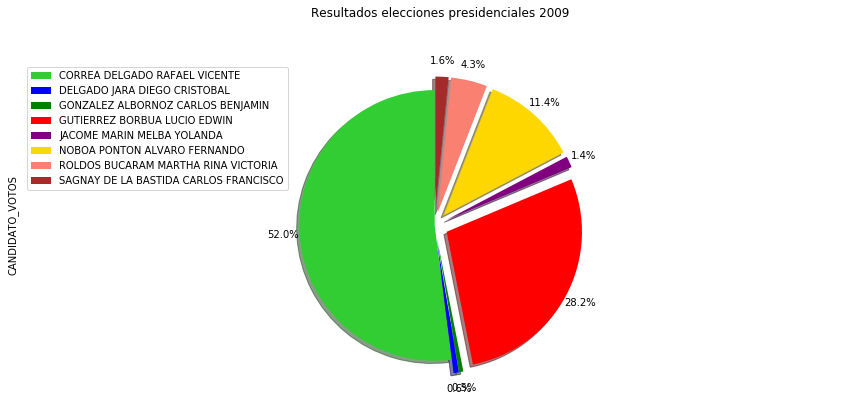

In [21]:
Colores= ['limegreen','blue','green','red','purple','gold','salmon','brown']
explode_list = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

df_rp['CANDIDATO_VOTOS'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=Colores,
                            pctdistance=1.12,
                            explode=explode_list
                            )

# Título del gráfico
plt.title('Resultados elecciones presidenciales 2009', y=1.12) 

plt.axis('equal') 

# Añadir leyenda
plt.legend(labels=df_rp.index, loc='upper left') 

plt.show()

In [30]:
df_rp.to_excel('Resultados 2009.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [31]:
del df_rp

## Agrupación de datos por provincia

Procedemos nuevamente a unir las tablas correspondientes para poder aislar los datos que necesitamos.

In [23]:
df_p=pd.merge(left=df_rs, right=df_c2009, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE
0,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO
1,1,1,260,285,35,274,265,48,1000000000001,1108,48.0,1.000000e+12,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1,260,285,35,274,265,56,1000000000004,2989,56.0,1.000000e+12,CORREA DELGADO RAFAEL VICENTE
3,1,1,260,285,35,274,265,75,1000000000005,28,75.0,1.000000e+12,JACOME MARIN MELBA YOLANDA
4,1,1,260,285,35,274,265,76,1000000000006,50,76.0,1.000000e+12,GONZALEZ ALBORNOZ CARLOS BENJAMIN


In [28]:
df_prov=df_p2009.drop(['CANTON_CODIGO','CANTON_NOMBRE','PARROQUIA_CODIGO','PARROQUIA_NOMBRE'], axis=1)
df_prov.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE
0,7,EL ORO
1,13,MANABI
2,1,AZUAY
3,6,CHIMBORAZO
4,15,NAPO


In [29]:
df_p=pd.merge(left=df_p, right=df_prov, how='left', left_on='PROVINCIA_CODIGO', right_on='PROVINCIA_CODIGO')
df_p.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE,PROVINCIA_NOMBRE
0,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,AZUAY
1,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,AZUAY
2,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,AZUAY
3,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,AZUAY
4,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,AZUAY


In [32]:
df_prov1=df_p.groupby(['PROVINCIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_prov1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PROVINCIA_NOMBRE                  CANDIDATO_NOMBRE                                         
AMERICA LATINA EL CARIBE Y AFRICA CORREA DELGADO RAFAEL VICENTE                     4117   
                                  DELGADO JARA DIEGO CRISTOBAL                      4117   
                                  GONZALEZ ALBORNOZ CARLOS BENJAMIN                 4117   
                                  GUTIERREZ BORBUA LUCIO EDWIN                      4117   
                                  JACOME MARIN MELBA YOLANDA                        4117   
...                                                                                  ...   
ZAMORA CHINCHIPE                  GUTIERREZ BORBUA LUCIO EDWIN                    143888   
                                  JACOME MARIN MELBA YOLANDA                      143888   
                                  NOBOA PONTON ALVARO FERNANDO                    143888   
                                  ROLDOS BUCARAM MARTHA RINA VICTORIA             143888   
                                  SAGNAY DE LA BASTIDA CARLOS FRANCISCO           143888   

                                                                         VOTOS_NULOS  \
PROVINCIA_NOMBRE                  CANDIDATO_NOMBRE                                     
AMERICA LATINA EL CARIBE Y AFRICA CORREA DELGADO RAFAEL VICENTE                15686   
                                  DELGADO JARA DIEGO CRISTOBAL                 15686   
                                  GONZALEZ ALBORNOZ CARLOS BENJAMIN            15686   
                                  GUTIERREZ BORBUA LUCIO EDWIN                 15686   
                                  JACOME MARIN MELBA YOLANDA                   15686   
...                                                                              ...   
ZAMORA CHINCHIPE                  GUTIERREZ BORBUA LUCIO EDWIN                 46512   
                                  JACOME MARIN MELBA YOLANDA                   46512   
                                  NOBOA PONTON ALVARO FERNANDO                 46512   
                                  ROLDOS BUCARAM MARTHA RINA VICTORIA          46512   
                                  SAGNAY DE LA BASTIDA CARLOS FRANCISCO        46512   

                                                                         CANDIDATO_VOTOS  
PROVINCIA_NOMBRE                  CANDIDATO_NOMBRE                                        
AMERICA LATINA EL CARIBE Y AFRICA CORREA DELGADO RAFAEL VICENTE                   113390  
                                  DELGADO JARA DIEGO CRISTOBAL                      1081  
                                  GONZALEZ ALBORNOZ CARLOS BENJAMIN                 1334  
                                  GUTIERREZ BORBUA LUCIO EDWIN                     20907  
                                  JACOME MARIN MELBA YOLANDA                        1541  
...                                                                                  ...  
ZAMORA CHINCHIPE                  GUTIERREZ BORBUA LUCIO EDWIN                    587758  
                                  JACOME MARIN MELBA YOLANDA                        7820  
                                  NOBOA PONTON ALVARO FERNANDO                     85340  
                                  ROLDOS BUCARAM MARTHA RINA VICTORIA              50252  
                                  SAGNAY DE LA BASTIDA CARLOS FRANCISCO            10846  

[216 rows x 3 columns]

In [33]:
df_prov2=df_prov1['CANDIDATO_VOTOS']
df_prov2=df_prov2.unstack(level=[1])

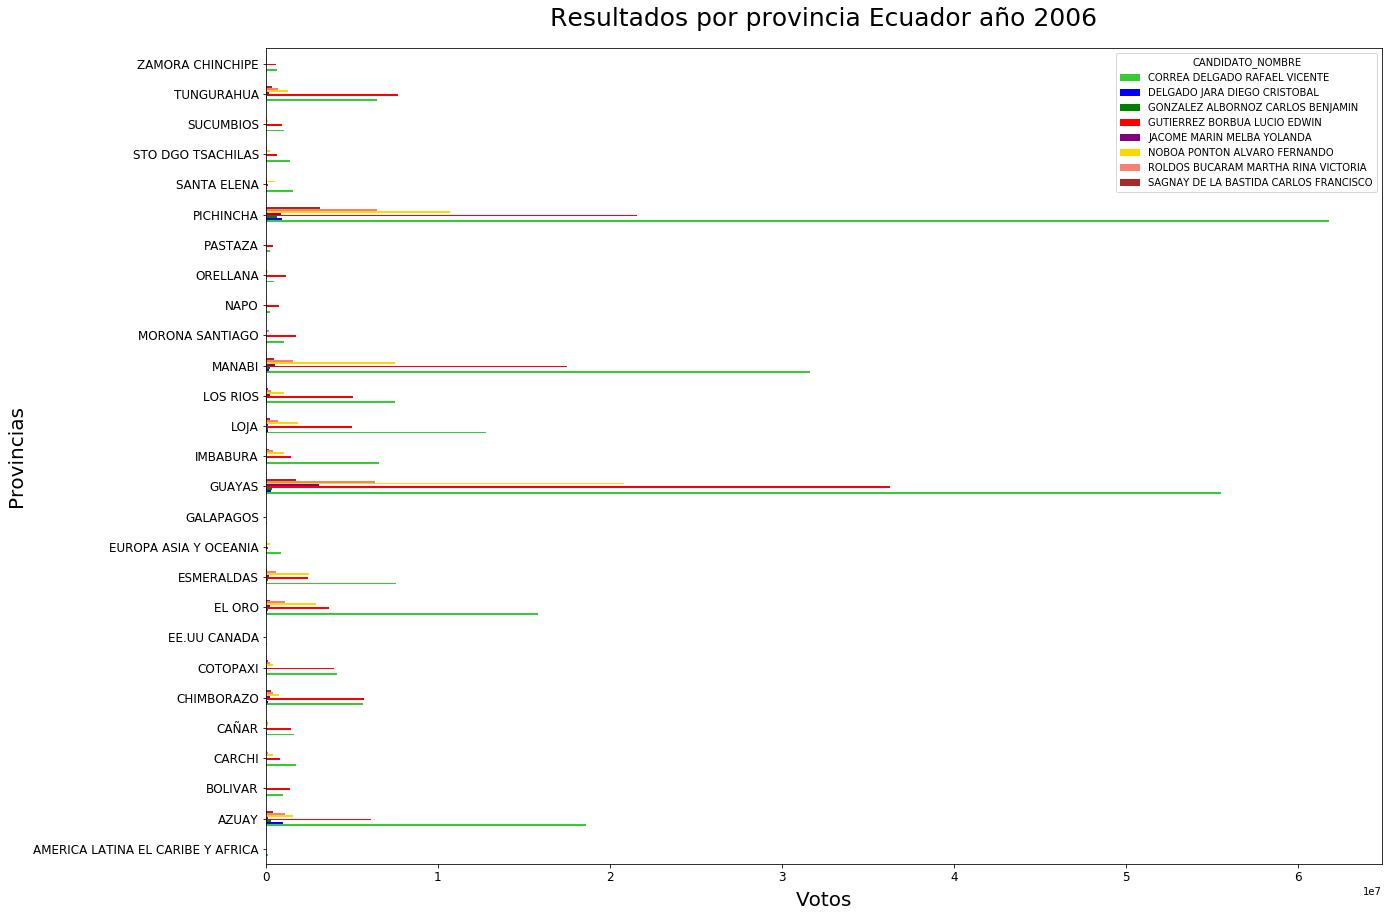

In [34]:
df_prov2.plot(kind='barh', figsize=(20,15), label=None, color=Colores)

plt.xlabel('Votos', fontsize=20, labelpad= 7)
plt.ylabel('Provincias', fontsize=20, labelpad= 7)
plt.title('Resultados por provincia Ecuador año 2006', fontsize=25, y=1.02)
plt.tick_params(labelsize=12)

plt.show()

In [35]:
df_prov1.to_excel('Provinciales 2009.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [36]:
del df_prov1
del df_prov
del df_p

## Agrupando los votos por canton

Nuevamente nos centramos en reunir la información en una sola tabla, esta vez voy a organizar los votos por cantón. Vamos a utilizar la misma tabla unificada, pero esta vez vamos a agrupar la información por cantón y nombre de candidato.

In [37]:
df_cant=df_p2009.drop(['PROVINCIA_CODIGO','PROVINCIA_NOMBRE','PARROQUIA_CODIGO','PARROQUIA_NOMBRE'], axis=1)
df_cant.head()

,CANTON_CODIGO,CANTON_NOMBRE
0,360,ZARUMA
1,440,PORTOVIEJO
2,285,SANTA ISABEL
3,215,ALAUSI
4,620,TENA


In [38]:
df_p=pd.merge(left=df_rs, right=df_c2009, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE
0,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO
1,1,1,260,285,35,274,265,48,1000000000001,1108,48.0,1.000000e+12,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1,260,285,35,274,265,56,1000000000004,2989,56.0,1.000000e+12,CORREA DELGADO RAFAEL VICENTE
3,1,1,260,285,35,274,265,75,1000000000005,28,75.0,1.000000e+12,JACOME MARIN MELBA YOLANDA
4,1,1,260,285,35,274,265,76,1000000000006,50,76.0,1.000000e+12,GONZALEZ ALBORNOZ CARLOS BENJAMIN


In [39]:
df_p=pd.merge(left=df_p, right=df_cant, how='left', left_on='CANTON_CODIGO', right_on='CANTON_CODIGO')
df_p.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE,CANTON_NOMBRE
0,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,CUENCA
1,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,CUENCA
2,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,CUENCA
3,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,CUENCA
4,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,CUENCA


In [40]:
df_cant1=df_p.groupby(['CANTON_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_cant1.head(20)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
CANTON_NOMBRE      CANDIDATO_NOMBRE                                         
24 DE MAYO         CORREA DELGADO RAFAEL VICENTE                    11540   
                   DELGADO JARA DIEGO CRISTOBAL                     11540   
                   GONZALEZ ALBORNOZ CARLOS BENJAMIN                11540   
                   GUTIERREZ BORBUA LUCIO EDWIN                     11540   
                   JACOME MARIN MELBA YOLANDA                       11540   
                   NOBOA PONTON ALVARO FERNANDO                     11540   
                   ROLDOS BUCARAM MARTHA RINA VICTORIA              11540   
                   SAGNAY DE LA BASTIDA CARLOS FRANCISCO            11540   
A.BAQUERIZO MORENO CORREA DELGADO RAFAEL VICENTE                     1627   
                   DELGADO JARA DIEGO CRISTOBAL                      1627   
                   GONZALEZ ALBORNOZ CARLOS BENJAMIN                 1627   
                   GUTIERREZ BORBUA LUCIO EDWIN                      1627   
                   JACOME MARIN MELBA YOLANDA                        1627   
                   NOBOA PONTON ALVARO FERNANDO                      1627   
                   ROLDOS BUCARAM MARTHA RINA VICTORIA               1627   
                   SAGNAY DE LA BASTIDA CARLOS FRANCISCO             1627   
AGUARICO           CORREA DELGADO RAFAEL VICENTE                     1860   
                   DELGADO JARA DIEGO CRISTOBAL                      1860   
                   GONZALEZ ALBORNOZ CARLOS BENJAMIN                 1860   
                   GUTIERREZ BORBUA LUCIO EDWIN                      1860   

                                                          VOTOS_NULOS  \
CANTON_NOMBRE      CANDIDATO_NOMBRE                                     
24 DE MAYO         CORREA DELGADO RAFAEL VICENTE                 6344   
                   DELGADO JARA DIEGO CRISTOBAL                  6344   
                   GONZALEZ ALBORNOZ CARLOS BENJAMIN             6344   
                   GUTIERREZ BORBUA LUCIO EDWIN                  6344   
                   JACOME MARIN MELBA YOLANDA                    6344   
                   NOBOA PONTON ALVARO FERNANDO                  6344   
                   ROLDOS BUCARAM MARTHA RINA VICTORIA           6344   
                   SAGNAY DE LA BASTIDA CARLOS FRANCISCO         6344   
A.BAQUERIZO MORENO CORREA DELGADO RAFAEL VICENTE                  770   
                   DELGADO JARA DIEGO CRISTOBAL                   770   
                   GONZALEZ ALBORNOZ CARLOS BENJAMIN              770   
                   GUTIERREZ BORBUA LUCIO EDWIN                   770   
                   JACOME MARIN MELBA YOLANDA                     770   
                   NOBOA PONTON ALVARO FERNANDO                   770   
                   ROLDOS BUCARAM MARTHA RINA VICTORIA            770   
                   SAGNAY DE LA BASTIDA CARLOS FRANCISCO          770   
AGUARICO           CORREA DELGADO RAFAEL VICENTE                  570   
                   DELGADO JARA DIEGO CRISTOBAL                   570   
                   GONZALEZ ALBORNOZ CARLOS BENJAMIN              570   
                   GUTIERREZ BORBUA LUCIO EDWIN                   570   

                                                          CANDIDATO_VOTOS  
CANTON_NOMBRE      CANDIDATO_NOMBRE                                        
24 DE MAYO         CORREA DELGADO RAFAEL VICENTE                    30072  
                   DELGADO JARA DIEGO CRISTOBAL                       192  
                   GONZALEZ ALBORNOZ CARLOS BENJAMIN                  300  
                   GUTIERREZ BORBUA LUCIO EDWIN                     17696  
                   JACOME MARIN MELBA YOLANDA                         368  
                   NOBOA PONTON ALVARO FERNANDO                      7328  
                   ROLDOS BUCARAM MARTHA RINA VICTORIA               1160  
                   SAGNAY DE LA BASTIDA CARLOS FRANCISCO              67

In [42]:
df_cant1.to_excel('Cantonales 2009.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [43]:
del df_cant1
del df_cant
del df_p

### Agrupando los votos por parroquia

Finalmente, hacemos lo mismo pero por parroquia. 

In [44]:
df_parr=df_p2009.drop(['PROVINCIA_CODIGO','PROVINCIA_NOMBRE','CANTON_CODIGO','CANTON_NOMBRE'], axis=1)
df_parr.head()

,PARROQUIA_CODIGO,PARROQUIA_NOMBRE
0,5,ABANIN
1,10,ABDON CALDERON
2,15,ABDON CALDERON / LA UNION
3,20,ACHUPALLAS
4,25,AHUANO


In [45]:
df_p=pd.merge(left=df_rs, right=df_c2009, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE
0,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO
1,1,1,260,285,35,274,265,48,1000000000001,1108,48.0,1.000000e+12,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1,260,285,35,274,265,56,1000000000004,2989,56.0,1.000000e+12,CORREA DELGADO RAFAEL VICENTE
3,1,1,260,285,35,274,265,75,1000000000005,28,75.0,1.000000e+12,JACOME MARIN MELBA YOLANDA
4,1,1,260,285,35,274,265,76,1000000000006,50,76.0,1.000000e+12,GONZALEZ ALBORNOZ CARLOS BENJAMIN


In [47]:
df_p=pd.merge(left=df_p, right=df_parr, how='left', left_on='PARROQUIA_CODIGO', right_on='PARROQUIA_CODIGO')
df_p.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE,PARROQUIA_NOMBRE
0,1,1,260,285,35,274,265,5,1000000000002,245,5.0,1.000000e+12,NOBOA PONTON ALVARO FERNANDO,BAÑOS
1,1,1,260,285,35,274,265,48,1000000000001,1108,48.0,1.000000e+12,GUTIERREZ BORBUA LUCIO EDWIN,BAÑOS
2,1,1,260,285,35,274,265,56,1000000000004,2989,56.0,1.000000e+12,CORREA DELGADO RAFAEL VICENTE,BAÑOS
3,1,1,260,285,35,274,265,75,1000000000005,28,75.0,1.000000e+12,JACOME MARIN MELBA YOLANDA,BAÑOS
4,1,1,260,285,35,274,265,76,1000000000006,50,76.0,1.000000e+12,GONZALEZ ALBORNOZ CARLOS BENJAMIN,BAÑOS


In [48]:
df_cant1=df_p.groupby(['PARROQUIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_cant1.head(30)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                         
10 DE AGOSTO     CORREA DELGADO RAFAEL VICENTE                      696   
                 DELGADO JARA DIEGO CRISTOBAL                       696   
                 GONZALEZ ALBORNOZ CARLOS BENJAMIN                  696   
                 GUTIERREZ BORBUA LUCIO EDWIN                       696   
                 JACOME MARIN MELBA YOLANDA                         696   
                 NOBOA PONTON ALVARO FERNANDO                       696   
                 ROLDOS BUCARAM MARTHA RINA VICTORIA                696   
                 SAGNAY DE LA BASTIDA CARLOS FRANCISCO              696   
11 DE NOVIEMBRE  CORREA DELGADO RAFAEL VICENTE                       72   
                 DELGADO JARA DIEGO CRISTOBAL                        72   
                 GONZALEZ ALBORNOZ CARLOS BENJAMIN                   72   
                 GUTIERREZ BORBUA LUCIO EDWIN                        72   
                 JACOME MARIN MELBA YOLANDA                          72   
                 NOBOA PONTON ALVARO FERNANDO                        72   
                 ROLDOS BUCARAM MARTHA RINA VICTORIA                 72   
                 SAGNAY DE LA BASTIDA CARLOS FRANCISCO               72   
11 DE OCTUBRE    CORREA DELGADO RAFAEL VICENTE                        0   
                 DELGADO JARA DIEGO CRISTOBAL                         0   
                 GONZALEZ ALBORNOZ CARLOS BENJAMIN                    0   
                 GUTIERREZ BORBUA LUCIO EDWIN                         0   
                 JACOME MARIN MELBA YOLANDA                           0   
                 NOBOA PONTON ALVARO FERNANDO                         0   
                 ROLDOS BUCARAM MARTHA RINA VICTORIA                  0   
                 SAGNAY DE LA BASTIDA CARLOS FRANCISCO                0   
12 DE DICIEMBRE  CORREA DELGADO RAFAEL VICENTE                      143   
                 DELGADO JARA DIEGO CRISTOBAL                       143   
                 GONZALEZ ALBORNOZ CARLOS BENJAMIN                  143   
                 GUTIERREZ BORBUA LUCIO EDWIN                       143   
                 JACOME MARIN MELBA YOLANDA                         143   
                 NOBOA PONTON ALVARO FERNANDO                       143   

                                                        VOTOS_NULOS  \
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                     
10 DE AGOSTO     CORREA DELGADO RAFAEL VICENTE                  248   
                 DELGADO JARA DIEGO CRISTOBAL                   248   
                 GONZALEZ ALBORNOZ CARLOS BENJAMIN              248   
                 GUTIERREZ BORBUA LUCIO EDWIN                   248   
                 JACOME MARIN MELBA YOLANDA                     248   
                 NOBOA PONTON ALVARO FERNANDO                   248   
                 ROLDOS BUCARAM MARTHA RINA VICTORIA            248   
                 SAGNAY DE LA BASTIDA CARLOS FRANCISCO          248   
11 DE NOVIEMBRE  CORREA DELGADO RAFAEL VICENTE                   78   
                 DELGADO JARA DIEGO CRISTOBAL                    78   
                 GONZALEZ ALBORNOZ CARLOS BENJAMIN               78   
                 GUTIERREZ BORBUA LUCIO EDWIN                    78   
                 JACOME MARIN MELBA YOLANDA                      78   
                 NOBOA PONTON ALVARO FERNANDO                    78   
                 ROLDOS BUCARAM MARTHA RINA VICTORIA             78   
                 SAGNAY DE LA BASTIDA CARLOS FRANCISCO           78   
11 DE OCTUBRE    CORREA DELGADO RAFAEL VICENTE                    0   
                 DELGADO JARA DIEGO CRISTOBAL                     0   
                 GONZALEZ ALBORNOZ CARLOS BENJAMIN                0   
                 GUTIERREZ BORBUA LUCIO EDWIN                     0   
                 JACOME MARIN MELBA YOLANDA                       0   
                 NOBOA

In [49]:
df_cant1.to_excel('Parroquiales 2009.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [50]:
del df_cant1
del df_p